![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [39]:
# Start your code here!
import pandas as pd

In [40]:
# importing datasets 
import pandas as pd

men = pd.read_csv("men_results.csv", parse_dates=["date"])
women = pd.read_csv("women_results.csv", parse_dates=["date"])

# filtering data
men_subset = men[(men["date"].dt.year >= 2002) & (men["tournament"] == "FIFA World Cup")]
women_subset = women[(women["date"].dt.year >= 2002) & (women["tournament"] == "FIFA World Cup")]

# adding total score
men_subset["total_score"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["total_score"] = women_subset["home_score"] + women_subset["away_score"]
men_subset["group"] = "men"
women_subset["group"] = "women"

# Concatenating the dataframes
df = pd.concat([men_subset, women_subset])
df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men
...,...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3,women
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3,women
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1,women
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3,women


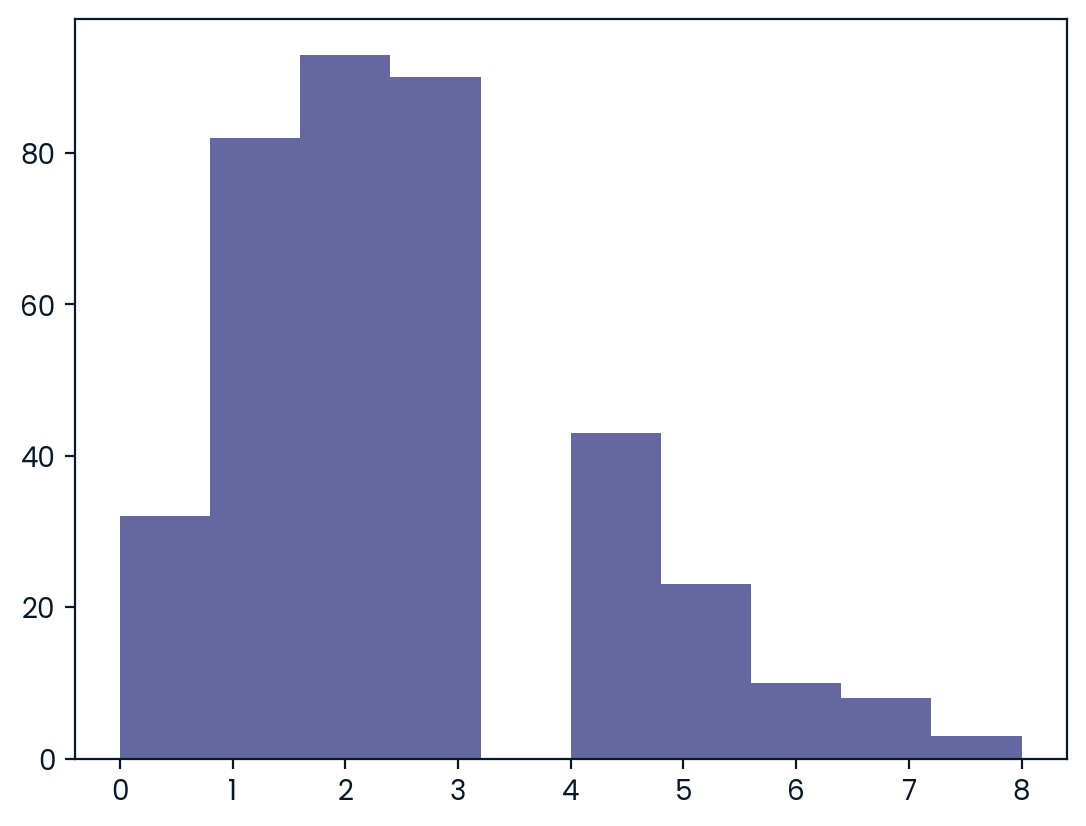

In [41]:
# determine normal distribution
import matplotlib.pyplot as plt

plt.hist(df[df["group"] == "men"]["total_score"], bins=10)
plt.show()

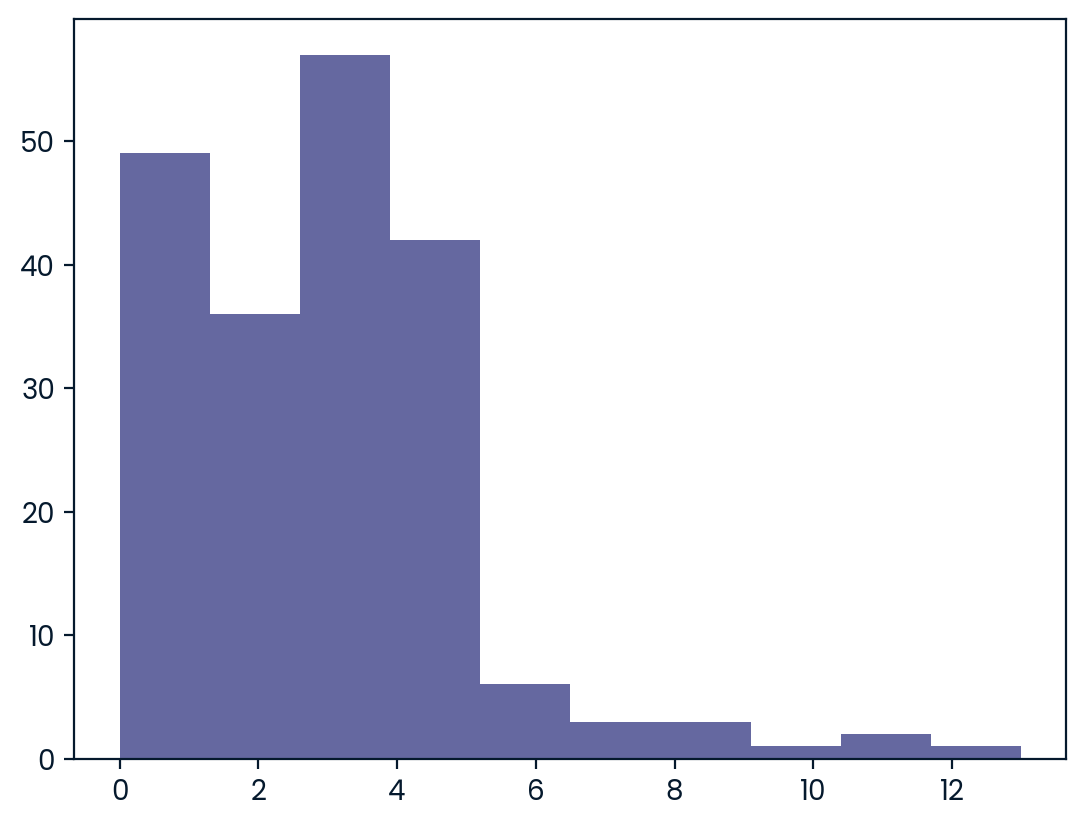

In [42]:
# determine normal distribution

plt.hist(df[df["group"] == "women"]["total_score"], bins=10)
plt.show()

In [43]:
# Wilcoxon-Mann-Whitney test
import numpy as np
import pingouin

df_pivot = df.pivot(columns="group", values="total_score")
wmu_test = pingouin.mwu(x=df_pivot["women"], y=df_pivot["men"], alternative="greater")
p_val = float(np.array(wmu_test["p-val"]))
p_val

0.005106609825443641

In [44]:
# interpreting result
alpha = 0.1
if p_val <= alpha:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val":p_val, "result":result}